In [1]:
import sys, os
import geopandas as gpd
import numpy as np

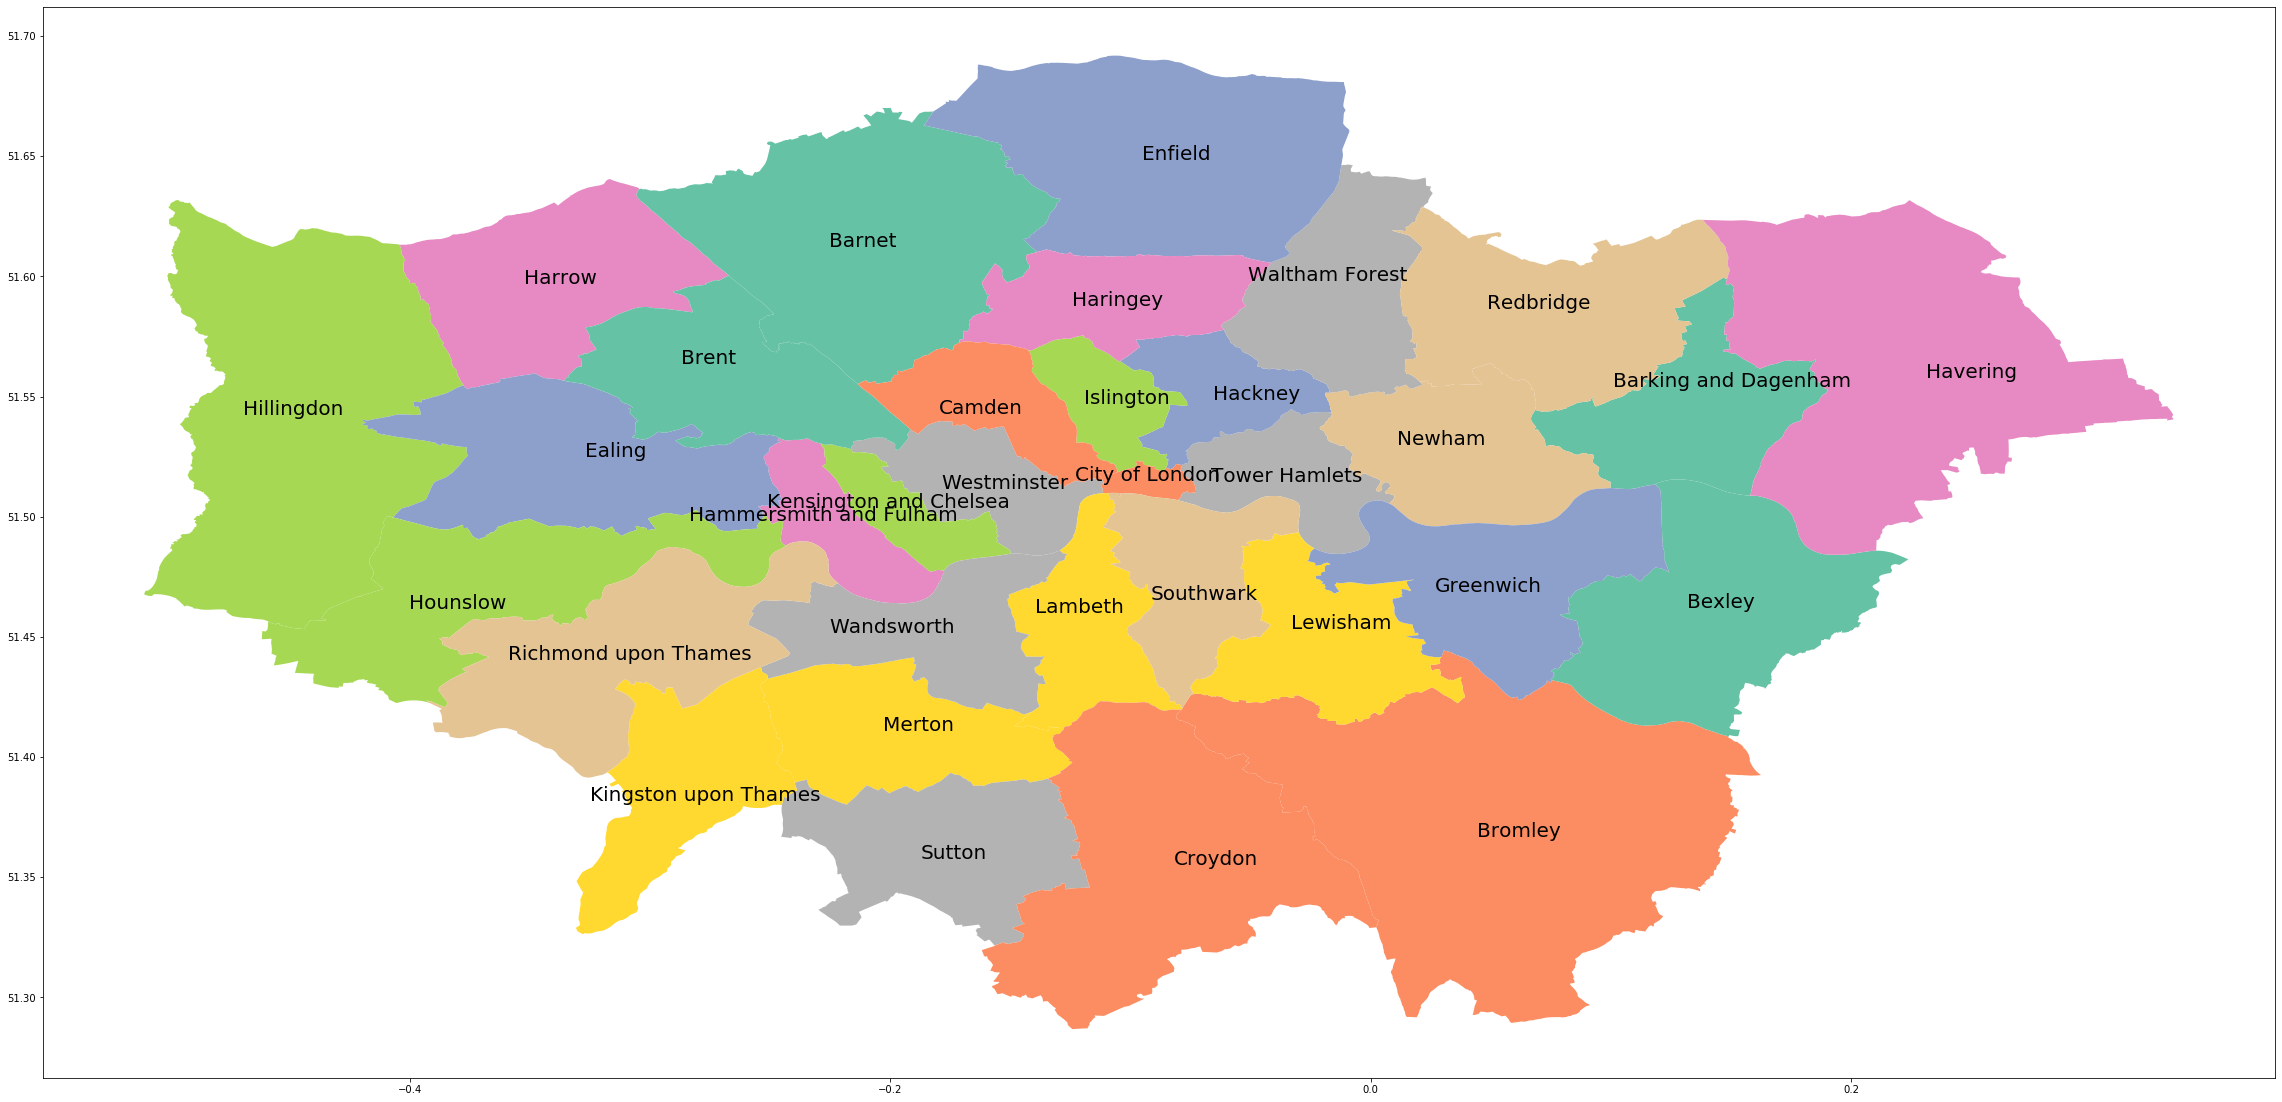

In [16]:
#1) Load and plot the vectorfile london_boroughs
# Import packages
import os
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import earthpy as et

# Set working directory
os.chdir('/home/suny/EAGLE-Master/second-semester/spatial-python/SpatialPython2020/Data/vector') 

# Import shapefile using geopandas
london_boroughs = gpd.read_file("london_boroughs.shp")
# View top 6 rows of attribute table
london_boroughs.head(6)

# situation in which you need to label the polygon objects! 
#You can then create a new column for your geopandas dataframe, 'coords' like so:
london_boroughs['coords'] = london_boroughs['geometry'].apply(lambda x: x.representative_point().coords[:])
london_boroughs['coords'] = [coords[0] for coords in london_boroughs['coords']]

#Now that you have a set of coordinates pertaining to each polygon object (each borough),
#you can annotate your plot by iterating through your dataframe
london_boroughs.plot(column='BOROUGH', 
                    figsize = (40,60),
                    cmap="Set2")

for idx, row in london_boroughs.iterrows():
    plt.annotate(s=row['BOROUGH'], xy=row['coords'],
                 horizontalalignment='center',
                 #bbox={'boxstyle':'round', 'facecolor':'none','alpha':5},you can uncomment this
                 fontsize=20)

plt.show()

In [62]:
#2) How many boroughs are contained in the dataset?
london_boroughs.tail()
london_boroughs.BOROUGH
london_boroughs.columns
london_boroughs.head()
#london_boroughs.BOROUGH.unique

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Millwall,E05000583,245.818,49.743,E09000030,Tower Hamlets,117257,"POLYGON ((-0.02995 51.49356, -0.03002 51.49398..."
1,Gascoigne,E05000032,113.874,4.906,E09000002,Barking and Dagenham,51280,"POLYGON ((0.16598 51.52880, 0.16591 51.52865, ..."
2,Roxeth,E05000302,157.492,0.000,E09000015,Harrow,51083,"POLYGON ((-0.34755 51.55968, -0.34885 51.55944..."
3,Palace Riverside,E05000259,148.083,34.321,E09000013,Hammersmith and Fulham,117145,"POLYGON ((-0.17782 51.47755, -0.17773 51.47742..."
4,Heathrow Villages,E05000331,2352.117,0.000,E09000017,Hillingdon,116716,"POLYGON ((-0.41066 51.49820, -0.41087 51.49779..."


In [6]:
#?????3) Change the coordinate system of the dataset to an area equal representation.
#Find out the difference between the method of an object and the attribute of an object.
#london_boroughs.crs
#type(london_boroughs)

london_boroughs=london_boroughs.to_crs(epsg=3575)#Lambert azimuthal equal-area (LAEA) projection for Europe
london_boroughs.crs

<Projected CRS: EPSG:3575>
Name: WGS 84 / North Pole LAEA Europe
Axis Info [cartesian]:
- X[south]: Easting (metre)
- Y[south]: Northing (metre)
Area of Use:
- name: World - north of 45°N
- bounds: (-180.0, 45.0, 180.0, 90.0)
Coordinate Operation:
- name: North Pole Lambert Azimuthal Equal Area (Europe)
- method: Lambert Azimuthal Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

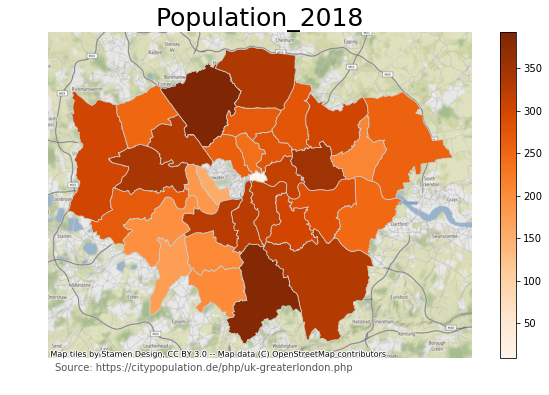

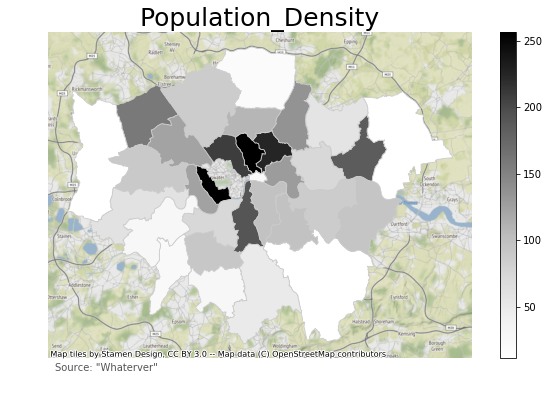

In [69]:
#?????4) Create a nice figure

#1: Add a column with the population per borough (including the City of London) to the dataset. Use following information:
london_boroughs['NAME']
london_boroughs['BOROUGH']
#type(london_boroughs)
pop_2018={'Barking and Dagenham':211.998,
        'Barnet':392.14,
        'Bexley':247.258,
        'Brent':330.795,
        'Tower Hamlets':317.705,
        'Harrow':250.149,
        'Hammersmith and Fulham':185.426,
        'Hillingdon':304.824,
        'Merton':206.186,
        'Hackney':279.665,
        'Islington':239.142,
        'Bromley':331.096,
        'Newham':352.005,
        'Waltham Forest':276.7,
        'Westminster':np.nan,
        'Ealing':341.982,
        'Kensington and Chelsea':156.197,
        'Lewisham':303.536,
        'Sutton':204.525,
        'City of London':8.706,
        'Lambeth':325.917,
        'Southwark':317.256,
        'Wandsworth':326.474,
        'Redbridge':303.858,
        'Hounslow':270.782,
        'Kingston upon Thames':175.47,
        'Croydon':385.346,
        'Havering':257.81,
        'Greenwich':286.186,
        'Richmond upon Thames':196.904,
        'Enfield':333.869,
        'Haringey':270.624,
        'Camden':262.226 
         }
london_boroughs['pop_2018']= london_boroughs['BOROUGH'].map(pop_2018)
london_boroughs.head()

#2: Plot the population per borough as map (simple version). 
#Optional and a bit tricky: Calculate the population density per borough and plot it (advanced version).

#(simple version)
import matplotlib.pyplot as plt

# set the range for the choropleth
#vmin, vmax = london_boroughs.pop_2018.min() , london_boroughs.pop_2018.max()
vmin, vmax = london_boroughs_Web_Mercator.pop_2018.min() , london_boroughs_Web_Mercator.pop_2018.max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
#london_boroughs.plot(column='pop_2018', cmap=plt.cm.Oranges, linewidth=0.8, ax=ax, edgecolor='0.8')
ax=london_boroughs_Web_Mercator.plot(column='pop_2018', cmap=plt.cm.Oranges, linewidth=0.8, ax=ax, edgecolor='0.8')
ctx.add_basemap(ax)#, url=ctx.providers.Stamen.TonerLite
#ax.set_axis_off()


# remove the axis
ax.axis('off')

# add a title
ax.set_title('Population_2018', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: https://citypopulation.de/php/uk-greaterlondon.php',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.Oranges, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# using apply function to create two columns for area in km^2 and popualation density
london_boroughs['km_squared'] = london_boroughs.apply(lambda row: row.HECTARES * 0.01, axis = 1) 

london_boroughs['pop_density'] = london_boroughs.apply(lambda row: (row.pop_2018)/(row.km_squared), axis = 1) 



#(advanced version)
import matplotlib.pyplot as plt

# set the range for the choropleth
vmin, vmax = london_boroughs_Web_Mercator.pop_density.min() , london_boroughs_Web_Mercator.pop_density.max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
#london_boroughs.plot(column='pop_density', cmap=plt.cm.Greys, linewidth=0.8, ax=ax, edgecolor='0.8')
ax=london_boroughs_Web_Mercator.plot(column='pop_density', cmap=plt.cm.Greys, linewidth=0.8, ax=ax, edgecolor='0.8')
ctx.add_basemap(ax)#, url=ctx.providers.Stamen.TonerLite

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Population_Density', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: "Whaterver"',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.Greys, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


#3: In both cases, please make sure a basemap is used as background of the map.
#Already taken care of in the previous section

In [57]:
import ipyleaflet
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl)
from ipywidgets import Text, HTML
from branca.colormap import linear
import geopandas as gpd
import json


m = ipyleaflet.Map(center=[51.5074, 0.1278], zoom=7)

layer = ipyleaflet.GeoJSON(data=london_boroughs.__geo_interface__)
m.add_layer(layer)
m

#stamen = basemap_to_tiles(basemaps.Stamen.Toner)
#m.add_layer(stamen)
#m

Map(center=[51.5074, 0.1278], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [70]:

#!pip install jupyterthemes

In [63]:
type(london_boroughs.geometry)
#!jt -l
london_boroughs_Web_Mercator.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry,pop_2018,km_squared,pop_density
0,Millwall,E05000583,245.818,49.743,E09000030,Tower Hamlets,117257,"POLYGON ((-3333.762 6709068.180, -3341.363 670...",317.705,2.45818,129.243994
1,Gascoigne,E05000032,113.874,4.906,E09000002,Barking and Dagenham,51280,"POLYGON ((18477.248 6715370.767, 18469.050 671...",211.998,1.13874,186.168924
2,Roxeth,E05000302,157.492,0.000,E09000015,Harrow,51083,"POLYGON ((-38689.618 6720898.845, -38833.364 6...",250.149,1.57492,158.832830
3,Palace Riverside,E05000259,148.083,34.321,E09000013,Hammersmith and Fulham,117145,"POLYGON ((-19794.351 6706206.218, -19784.672 6...",185.426,1.48083,125.217614
4,Heathrow Villages,E05000331,2352.117,0.000,E09000017,Hillingdon,116716,"POLYGON ((-45714.444 6709897.178, -45737.511 6...",304.824,23.52117,12.959559


In [13]:
#!jt -t gruvboxl
type(london_boroughs)

geopandas.geodataframe.GeoDataFrame